In [1]:
%matplotlib inline

In [2]:
import torch

import matplotlib.pyplot as plt
import networkx as nx
import itertools
import numpy as np
from collections import Counter
from icecream import ic


In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


In [4]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=1)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))
G.nodes(data=True)


Node 0 has the attributes {'feature': 5, 'label': 1}


NodeDataView({0: {'feature': 5, 'label': 1}})

In [5]:
# Add multiple nodes with attributes
G.add_nodes_from(
    [(1, {"feature": 1, "label": 1}), (2, {"feature": 2, "label": 2})]
)  # (node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
    print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 1})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [6]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [7]:
# Add multiple edges with edge weights
G.add_edges_from([(1, 2, {"weight": 0.3}), (2, 0, {"weight": 0.1})])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
    print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))


(0, 1)
(0, 2)
(1, 2)
G has 3 edges


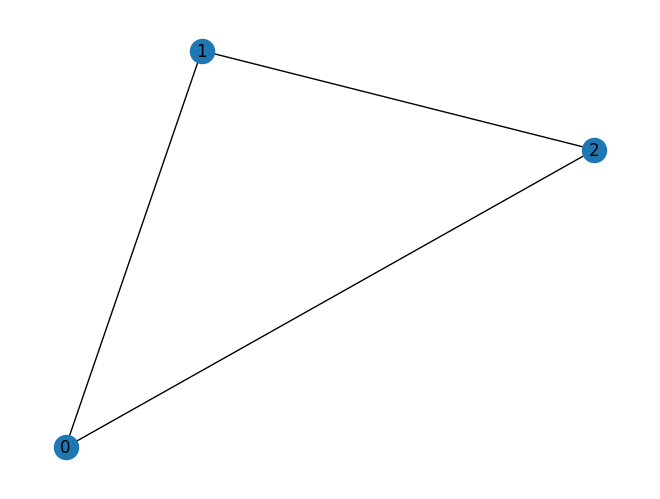

In [8]:
# Draw the graph
nx.draw(G, with_labels=True)

In [9]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
    print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

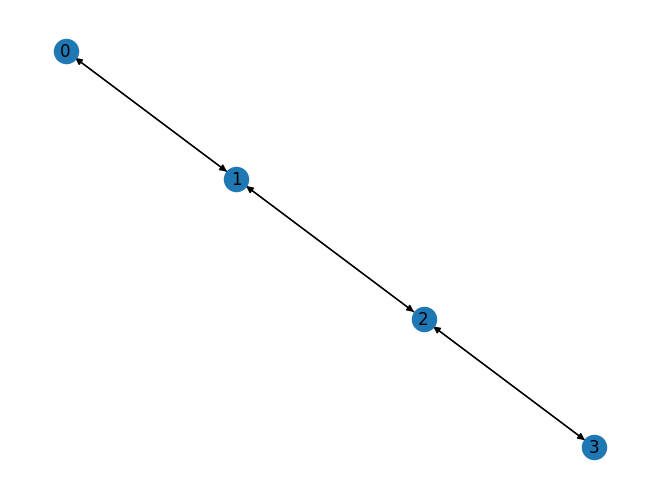

In [10]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels=True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Zachary's karate club network

The [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a graph which describes a social network of 34 members of a karate club and documents links between members who interacted outside the club.

A social network of a kar
ate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972.[2] The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

In [11]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

In [12]:
G.nodes(data=True)

# G.nodes() returns an iterator


NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

/Users/jkunz/Projects/cop_gnn/.venv/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


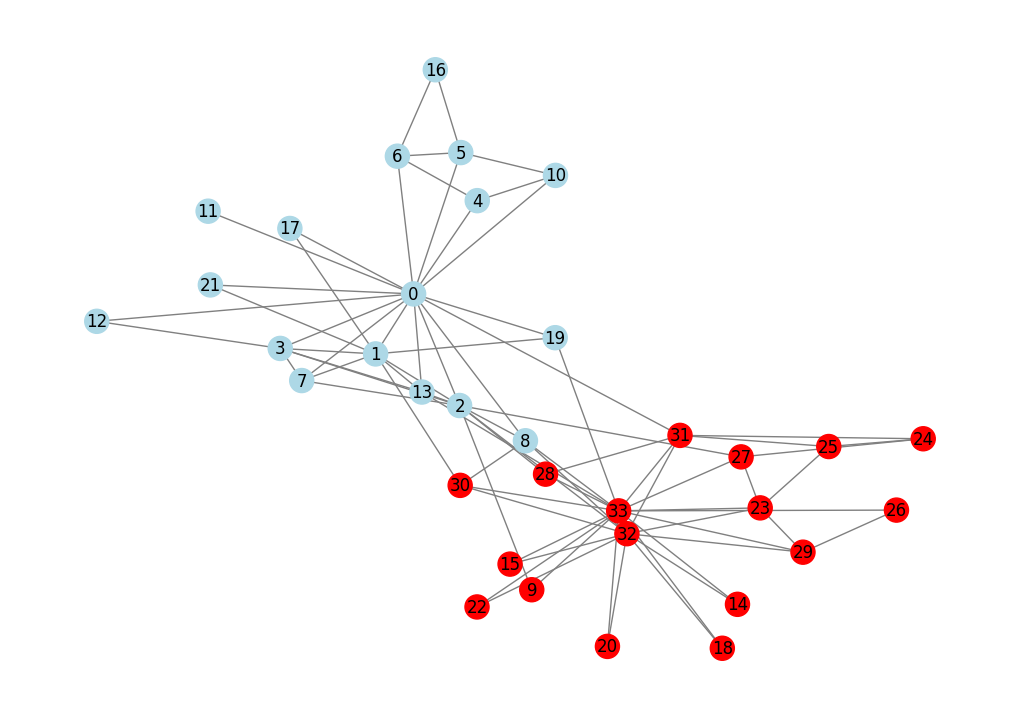

In [13]:
# Visualize the graph
def plot_graph(G, figsize=(10, 7)):
    club_dict = nx.get_node_attributes(G, "club")
    colors = [
        "lightblue" if club_dict[node] == "Mr. Hi" else "red" for node in G.nodes()
    ]
    plt.figure(figsize=figsize)
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=colors,
        edge_color="gray",
        cmap="Set2",
    )


plot_graph(G)

## Compute graphlet vector per node

![](../resources/graphlets.png)

> Caution
    **Here we don't compute case d**

In [14]:
import pyfglt.fglt as fg

F = fg.compute(G)

Total elapsed time: 0.0000 sec


In [16]:
F

,[0] vertex (==1),[1] degree,[2] 2-path,[3] bifork,[4] 3-cycle,"[5] 3-path, end","[6] 3-path, interior","[7] claw, leaf","[8] claw, root","[9] paw, handle","[10] paw, base","[11] paw, center",[12] 4-cycle,"[13] diamond, off-cord","[14] diamond, on-cord",[15] 4-clique
Node id (0-based),,,,,,,,,,,,,,,,
0,1,16,17,102,18,81,197,13,352,6,34,171,10,2,30,7
1,1,9,19,24,12,73,56,33,32,8,80,27,6,2,18,7
2,1,10,34,34,11,72,179,84,54,17,75,51,20,6,8,7
3,1,6,20,5,10,49,11,56,1,5,81,5,0,4,7,7
4,1,3,16,1,2,17,1,64,0,15,25,0,1,2,1,0
5,1,4,15,3,3,15,14,64,0,14,25,2,1,2,2,0
6,1,4,15,3,3,15,14,64,0,14,25,2,1,2,2,0
7,1,4,25,0,6,37,0,87,0,5,53,0,0,11,0,4
8,1,5,44,5,5,31,74,208,0,23,58,6,10,12,3,1


In [15]:
triangles_per_node = nx.triangles(G)
triangles_per_node.get(0)


18

In [16]:
all_cliques = list(nx.enumerate_all_cliques(G))  # Get all cliques
all_cliques
nb_triangles_per_node = [clique for clique in all_cliques if len(clique) == 3]
nb_triangles_per_node[:3]

[[0, 1, 2], [0, 1, 3], [0, 1, 7]]

In [26]:
all_cliques
adj_mtrx = nx.to_numpy_array(G)
adj_mtrx

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

In [27]:
# for each triangles get tuple of edges
# if triangle 0,1,2 then edges are (0,1), (0,2), (1,2)
triangle_edges = set()
for t in nb_triangles_per_node:
    # it sort tuple from min to max to have 0,1 and not 1,0
    triangle_edges.update(
        [(min(t[i], t[j]), max(t[i], t[j])) for i in range(3) for j in range(i + 1, 3)]
    )
ic(triangle_edges);

ic| triangle_edges: {(0, 1),
                     (0, 2),
                     (0, 3),
                     (0, 4),
                     (0, 5),
                     (0, 6),
                     (0, 7),
                     (0, 8),
                     (0, 10),
                     (0, 12),
                     (0, 13),
                     (0, 17),
                     (0, 19),
                     (0, 21),
                     (1, 2),
                     (1, 3),
                     (1, 7),
                     (1, 13),
                     (1, 17),
                     (1, 19),
                     (1, 21),
                     (2, 3),
                     (2, 7),
                     (2, 8),
                     (2, 13),
                     (2, 32),
                     (3, 7),
                     (3, 12),
                     (3, 13),
                     (4, 6),
                     (4, 10),
                     (5, 6),
                     (5, 10),
                     (5, 16

In [28]:
# Do it for one node
node = 0
ic(triangles_per_node[node])
neighbors = set(G.neighbors(node))
ic(neighbors)

edges = set((min(node, n), max(node, n)) for n in neighbors)
ic(edges)


ic| triangles_per_node[node]: 18
ic| neighbors: {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31}
ic| edges: {(0, 1),
            (0, 2),
            (0, 3),
            (0, 4),
            (0, 5),
            (0, 6),
            (0, 7),
            (0, 8),
            (0, 10),
            (0, 11),
            (0, 12),
            (0, 13),
            (0, 17),
            (0, 19),
            (0, 21),
            (0, 31)}


{(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31)}

In [29]:
remaining_edges = edges - triangle_edges
ic(remaining_edges)

ic| remaining_edges: {(0, 31), (0, 11)}


{(0, 11), (0, 31)}

In [30]:
# G2: Wedges (next priority)
# neighbouts nodes of node 0 (are connected to node 0), but not connected to each other
wedges = 0
used_neighbors = set()
for i in neighbors:
    for j in neighbors:
        if (
            i < j
            and not G.has_edge(i, j)  # key so neighbors are not connected
            and (min(node, i), max(node, i)) in remaining_edges
            and (min(node, j), max(node, j)) in remaining_edges
        ):
            wedges += 1
            used_neighbors.add(i)
            used_neighbors.add(j)


In [31]:
# Let's put it together
# Initialize a dictionary to store exclusive graphlet vectors
graphlet_vectors = {}

# Step 1: Identify all triangles first
triangles_per_node = nx.triangles(G)
all_triangles = list(nx.enumerate_all_cliques(G))  # Get all cliques
triangles = [clique for clique in all_triangles if len(clique) == 3]  # Filter to size 3
triangle_edges = set()
for t in triangles:
    triangle_edges.update(
        [(min(t[i], t[j]), max(t[i], t[j])) for i in range(3) for j in range(i + 1, 3)]
    )

# Step 2: Process each node
for node in G.nodes():
    # G1: Triangles (highest priority)
    nb_triangles_per_node = triangles_per_node[node]

    # Get neighbors and edges
    neighbors = set(G.neighbors(node))
    edges = set((min(node, n), max(node, n)) for n in neighbors)

    # Exclude edges in triangles
    remaining_edges = edges - triangle_edges

    # G2: Wedges (next priority)
    # neighbours of node, but not connected to each other
    wedges = 0
    used_neighbors = set()
    for i in neighbors:
        for j in neighbors:
            if (
                i < j
                and not G.has_edge(i, j)
                and (min(node, i), max(node, i)) in remaining_edges
                and (min(node, j), max(node, j)) in remaining_edges
            ):
                wedges += 1
                used_neighbors.add(i)
                used_neighbors.add(j)

    # G0: Remaining edges (lowest priority),
    edge_count = len(
        remaining_edges - set((min(node, n), max(node, n)) for n in used_neighbors)
    )

    # Store the exclusive graphlet vector [edges, triangles, wedges]
    graphlet_vectors[node] = [edge_count, nb_triangles_per_node, wedges]

# Print results
print("Exclusive graphlet vectors for each node (node no: [edges, triangles, wedges]):")
for node in sorted(graphlet_vectors.keys()):
    print(f"Node {node}: {graphlet_vectors[node]}")

Exclusive graphlet vectors for each node (node no: [edges, triangles, wedges]):
Node 0: [0, 18, 1]
Node 1: [1, 12, 0]
Node 2: [0, 11, 3]
Node 3: [0, 10, 0]
Node 4: [0, 2, 0]
Node 5: [0, 3, 0]
Node 6: [0, 3, 0]
Node 7: [0, 6, 0]
Node 8: [0, 5, 0]
Node 9: [0, 0, 1]
Node 10: [0, 2, 0]
Node 11: [1, 0, 0]
Node 12: [0, 1, 0]
Node 13: [1, 6, 0]
Node 14: [0, 1, 0]
Node 15: [0, 1, 0]
Node 16: [0, 1, 0]
Node 17: [0, 1, 0]
Node 18: [0, 1, 0]
Node 19: [1, 1, 0]
Node 20: [0, 1, 0]
Node 21: [0, 1, 0]
Node 22: [0, 1, 0]
Node 23: [1, 4, 0]
Node 24: [1, 1, 0]
Node 25: [1, 1, 0]
Node 26: [0, 1, 0]
Node 27: [0, 1, 1]
Node 28: [1, 1, 0]
Node 29: [0, 4, 0]
Node 30: [1, 3, 0]
Node 31: [1, 3, 0]
Node 32: [0, 13, 0]
Node 33: [0, 15, 3]


## Node centrality

In [48]:
from networkx import (
    eigenvector_centrality,
    closeness_centrality,
    betweenness_centrality,
)


eigenvector_centrality(G)

{0: 0.35548349418519426,
 1: 0.2659538704545024,
 2: 0.3171893899684447,
 3: 0.21117407832057056,
 4: 0.0759664588165738,
 5: 0.07948057788594245,
 6: 0.07948057788594245,
 7: 0.1709551149803543,
 8: 0.22740509147166046,
 9: 0.10267519030637756,
 10: 0.0759664588165738,
 11: 0.05285416945233646,
 12: 0.08425192086558085,
 13: 0.22646969838808145,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.02363479426059687,
 17: 0.0923967566684595,
 18: 0.10140627846270832,
 19: 0.14791134007618667,
 20: 0.10140627846270832,
 21: 0.0923967566684595,
 22: 0.10140627846270832,
 23: 0.15012328691726787,
 24: 0.057053735638028055,
 25: 0.0592082025027901,
 26: 0.07558192219009324,
 27: 0.13347932684333308,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493088,
 31: 0.191036269797917,
 32: 0.3086510477336959,
 33: 0.37337121301323506}

In [47]:
closeness_centrality(G)

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [49]:
betweenness_centrality(G)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [52]:
from networkx import shortest_path

shortest_path(G, source=0, target=33)

[0, 8, 33]

## Isormorphic

Case 1: Are subgraphs [0, 1, 2] and [13, 19, 33] isomorphic?
Result: False


/Users/jkunz/Library/Caches/pypoetry/virtualenvs/cop-gnn-IZjXzcTC-py3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


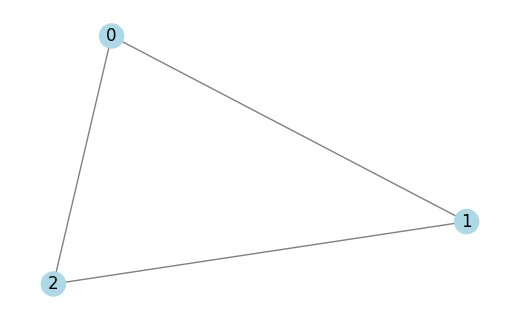

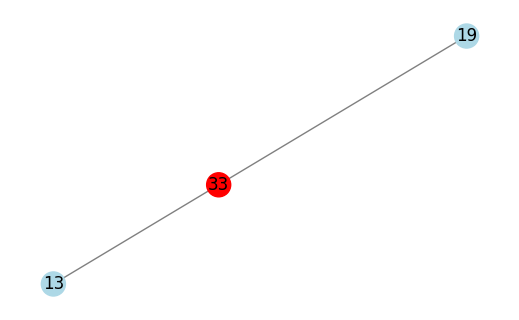

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism

# Create the Zachary Karate Club graph
G = nx.karate_club_graph()


# Function to plot a subgraph
def plot_subgraph(subgraph, title):
    plt.figure()
    pos = nx.spring_layout(subgraph)
    nx.draw(
        subgraph,
        pos,
        with_labels=True,
        node_color="lightblue",
        node_size=500,
        font_size=10,
    )
    plt.title(title)
    plt.show()


subgraph1_nodes = [0, 1, 2]  # A triangle: 0-1, 1-2, 0-2
subgraph2_nodes = [13, 19, 33]  # Another triangle: 13-19, 19-33, 13-33
subgraph1 = G.subgraph(subgraph1_nodes)
subgraph2 = G.subgraph(subgraph2_nodes)

# Test for isomorphism
are_isomorphic = nx.is_isomorphic(subgraph1, subgraph2)
print("Case 1: Are subgraphs [0, 1, 2] and [13, 19, 33] isomorphic?")
print(f"Result: {are_isomorphic}")

# Visualize
plot_graph(subgraph1, figsize=(5, 3))
plot_graph(subgraph2, figsize=(5, 3))
